In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

In [69]:
df = pd.read_excel('../data/NBAStats.xlsx').set_index('PLAYER')
df = df[df['GP'] >= 10]
# Perhaps a poor practice and should remove them in the scraping algorithm
df = df.drop(columns=['TEAM', 'W', 'L', 'GP', 'DREB', 'STL', 'BLK'])
df = df.astype(float)

Removes the team column from the dataframe for now. It may be added back for future analysis but as a string it causes problems for the clustering algorithm. Also dropping players who have played less than 10 games because the sample size is so small.

In [70]:
dfPlayerCol = df.reset_index()
df

,AGE,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,...,FGM%UAST,DEF RTG,%DREB,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Anthony Black,20.0,24.1,105.4,104.5,0.9,24.0,1.61,25.8,2.1,9.3,...,53.7,104.5,14.4,20.7,19.6,9.6,5.5,6.6,21.8,0.119
Ayo Dosunmu,24.0,30.8,111.5,118.4,-6.9,21.5,3.63,28.6,1.9,10.2,...,31.3,118.4,14.9,18.5,16.7,11.2,9.5,9.9,37.5,0.026
Bennedict Mathurin,22.0,32.9,113.2,112.3,0.9,7.9,0.89,10.0,3.8,14.7,...,38.1,112.3,22.1,13.8,9.7,11.8,9.3,8.8,33.9,0.086
Clint Capela,30.0,22.9,108.3,107.9,0.4,7.6,1.36,11.7,14.2,23.1,...,22.7,107.9,34.5,11.9,40.8,9.4,6.5,7.8,23.1,0.090
De'Aaron Fox,27.0,37.2,112.2,111.3,0.9,26.8,1.78,19.1,2.9,10.2,...,65.1,111.3,15.3,27.7,7.2,13.0,10.6,8.4,33.9,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kobe Bufkin,21.0,12.4,95.3,103.3,-8.0,21.3,2.13,21.3,3.5,12.3,...,44.4,103.3,17.6,12.5,18.2,5.5,2.7,5.4,11.6,0.066
Kristaps Porziņģis,29.0,28.6,113.8,107.9,5.9,7.9,1.88,8.0,4.6,17.3,...,17.2,107.9,22.7,17.0,48.5,8.7,5.7,9.0,26.8,0.116
Robert Williams III,27.0,17.1,109.7,115.7,-6.0,10.9,1.50,17.9,10.6,19.0,...,25.8,115.7,32.1,29.6,42.4,8.9,4.9,6.8,16.8,0.029


In [71]:
features = list(df.columns)
# Removes the column titles for data processing
x = df.loc[:, features].values
# Good practice to scale the data down based on variance
x = StandardScaler().fit_transform(x) 


Feature refers to the data that you are using in ML model to make predictions. Feature engineering is the process of finding the best features for the model. 

In [72]:
variance_list = []
for n_components in range(2,len(df.columns)):
    # Dimensionality Reduction
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print(f"Variance with {n_components} components: {variance}")


Variance with 2 components: 0.4055760448010348
Variance with 3 components: 0.5255174397536985
Variance with 4 components: 0.610779934692141
Variance with 5 components: 0.6626283474155781
Variance with 6 components: 0.710111391947907
Variance with 7 components: 0.7470968897243975
Variance with 8 components: 0.7758165918754846
Variance with 9 components: 0.8029017611518278
Variance with 10 components: 0.8271193640886713
Variance with 11 components: 0.8487540012087363
Variance with 12 components: 0.8696931653848026
Variance with 13 components: 0.8891646284236993
Variance with 14 components: 0.9058002323949669
Variance with 15 components: 0.9211590891268968
Variance with 16 components: 0.9357284020550599
Variance with 17 components: 0.9472931443336444
Variance with 18 components: 0.9581086631720745
Variance with 19 components: 0.9683786422827066
Variance with 20 components: 0.9742745313519907
Variance with 21 components: 0.9790688616959076
Variance with 22 components: 0.9835678955535574
Va

This helps determine how much variance in the dataset is captured as the number of components increases. This will aid in choosing the ideal number of components for dimensionality reduction.

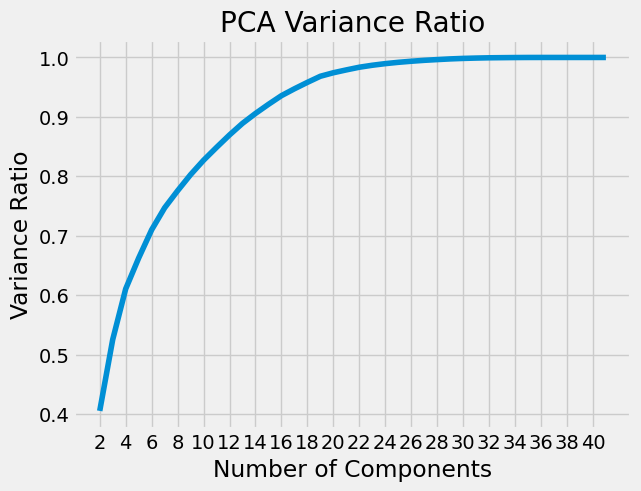

In [73]:
#Useful graph for visualization of ratio changes
plt.style.use('fivethirtyeight')
pca_fig, ax = plt.subplots()
ax.plot(range(2,len(df.columns)), variance_list)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('PCA Variance Ratio')
pca_fig.savefig('../images/PCA_Variance_Ratio.png')

In [74]:
from numpy import diff
diff_variance = diff(variance_list)
print(diff_variance)

[1.19941395e-01 8.52624949e-02 5.18484127e-02 4.74830445e-02
 3.69854978e-02 2.87197022e-02 2.70851693e-02 2.42176029e-02
 2.16346371e-02 2.09391642e-02 1.94714630e-02 1.66356040e-02
 1.53588567e-02 1.45693129e-02 1.15647423e-02 1.08155188e-02
 1.02699791e-02 5.89588907e-03 4.79433034e-03 4.49903386e-03
 3.32057560e-03 2.72201279e-03 2.20810012e-03 1.80800415e-03
 1.55666010e-03 1.23946700e-03 1.13626585e-03 8.39088936e-04
 5.85239339e-04 4.51778236e-04 2.25220562e-04 1.99778435e-04
 1.15730986e-04 2.37883002e-05 3.36071484e-07 5.35029778e-08
 4.46211756e-09 0.00000000e+00 0.00000000e+00]


This calculates the difference between consecutive elements in the variance_list array. Slope calculus, used to determine the "elbow point" in PCA which is where the rate of variance slows down

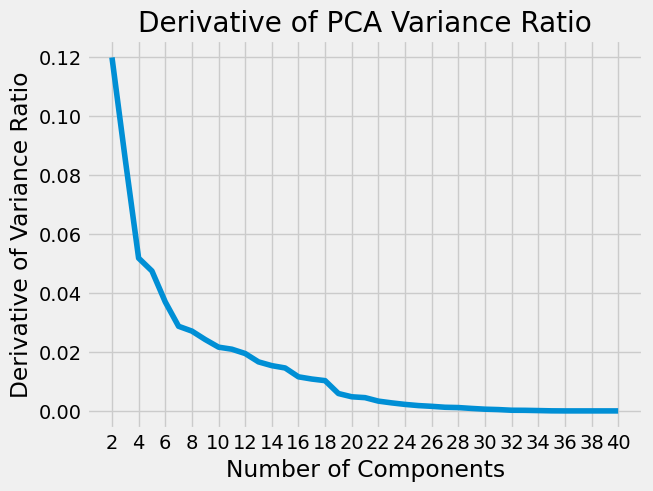

In [75]:
pca_deriv, ax = plt.subplots()
ax.plot(range(2, len(df.columns) - 1), diff_variance)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Derivative of Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('Derivative of PCA Variance Ratio')
pca_deriv.savefig('../images/PCA_Derivative.png')

Good data should have a high PCA Variance Ratio along with a low Derivative of the Variance Ratio. By using both criteria, you balance data representativeness (high variance ratio) and computational efficiency (low derivative).

In [76]:
n_comp = 16
pca = PCA(n_components=n_comp)

# Reducing the dimensions of the data
components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = [f'PC{i}' for i in range(1, n_comp + 1)])

pca_df['PLAYER'] = dfPlayerCol['PLAYER']
pca_df = pca_df[['PLAYER'] + [f'PC{i}' for i in range(1, n_comp + 1)]]
pca_df

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.20613808 0.19943796 0.11994139 0.08526249 0.05184841 0.04748304
 0.0369855  0.0287197  0.02708517 0.0242176  0.02163464 0.02093916
 0.01947146 0.0166356  0.01535886 0.01456931]
0.9357284020550599


In [77]:
x = np.column_stack([pca_df[f'PC{i}'] for i in range(1, n_comp)])

# We want a high silhouette score along with meaningful analysis
silhouette = []

for n_clusters in range(2, 32):
    kmeans = KMeans(n_clusters=n_clusters, random_state = 1)
    cluster_labels = kmeans.fit_predict(x)
    centers = kmeans.cluster_centers_
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print(f"Silhouette Score with {n_clusters} clusters: {score}")

Silhouette Score with 2 clusters: 0.1421611718794299
Silhouette Score with 3 clusters: 0.17438462761866533
Silhouette Score with 4 clusters: 0.15813898203518573
Silhouette Score with 5 clusters: 0.13898340496875142
Silhouette Score with 6 clusters: 0.1380734663757731
Silhouette Score with 7 clusters: 0.1263884378352405
Silhouette Score with 8 clusters: 0.11650161447008812
Silhouette Score with 9 clusters: 0.11108754686100294
Silhouette Score with 10 clusters: 0.11146888896912689
Silhouette Score with 11 clusters: 0.10096799265984248
Silhouette Score with 12 clusters: 0.08658150403034111
Silhouette Score with 13 clusters: 0.0862112020938379
Silhouette Score with 14 clusters: 0.08043532044666887
Silhouette Score with 15 clusters: 0.07671839654010036
Silhouette Score with 16 clusters: 0.0794043662651932
Silhouette Score with 17 clusters: 0.07670162659369274
Silhouette Score with 18 clusters: 0.0776079210340082
Silhouette Score with 19 clusters: 0.07587221730185979
Silhouette Score with 20

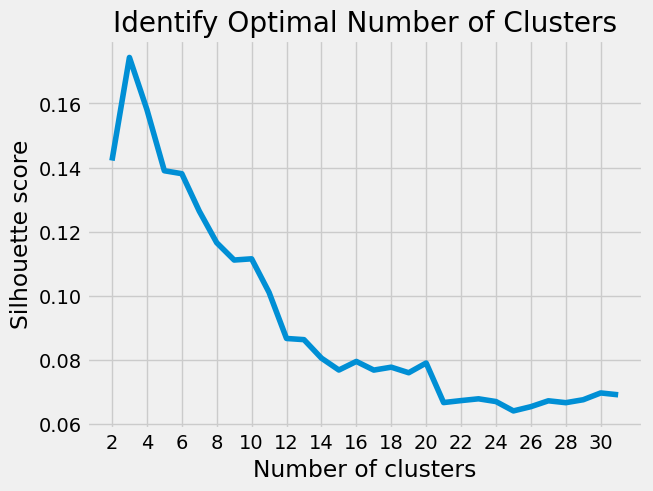

In [78]:
plt.style.use('fivethirtyeight')
silhouette_fig, ax = plt.subplots()
ax.plot(range(2,2 + len(silhouette)), silhouette)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(np.arange(2, 2+len(silhouette), 2))
ax.set_title('Identify Optimal Number of Clusters')
silhouette_fig.savefig('../images/Optimal_Clusters.png')

In [79]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1-silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print(f"for n_cluseter = {i + 2}, improvement = {improvement}") 

for n_cluseter = 3, improvement = 0.03756353138017021
for n_cluseter = 4, improvement = -0.01967701441486258
for n_cluseter = 5, improvement = -0.022753847318816023
for n_cluseter = 6, improvement = -0.0010568188792519084
for n_cluseter = 7, improvement = -0.013556872987074087
for n_cluseter = 8, improvement = -0.011317184654302537
for n_cluseter = 9, improvement = -0.00612798811832338
for n_cluseter = 10, improvement = 0.0004289984989829243
for n_cluseter = 11, improvement = -0.011818265200755018
for n_cluseter = 12, improvement = -0.016002198489089015
for n_cluseter = 13, improvement = -0.0004054022752300046
for n_cluseter = 14, improvement = -0.006320805924086459
for n_cluseter = 15, improvement = -0.004042047274340765
for n_cluseter = 16, improvement = 0.0029091554678739584
for n_cluseter = 17, improvement = -0.002935859754771508
for n_cluseter = 18, improvement = 0.0009815834906887755
for n_cluseter = 19, improvement = -0.0018817418012675446
for n_cluseter = 20, improvement = 0.00

C:\conda_tmp\ipykernel_18116\1289475222.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


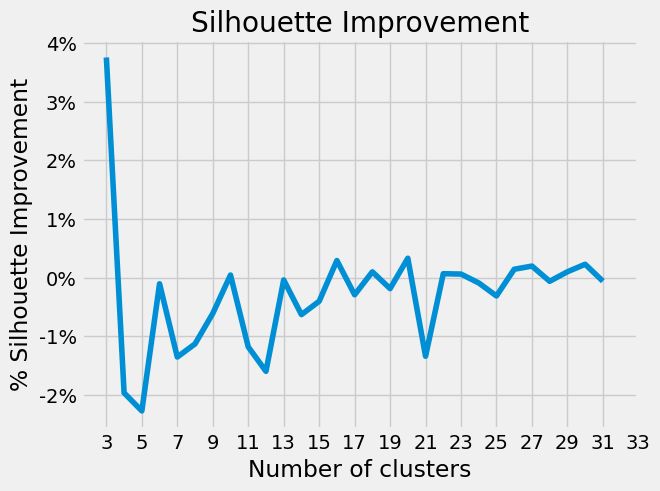

In [80]:
plt.style.use('fivethirtyeight')
silhouette_improvement_fig, ax = plt.subplots()
ax.plot(range(3, 2 + len(silhouette)), silhouette_diff)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('% Silhouette Improvement')
ax.set_xticks(np.arange(3, 4 + len(silhouette), 2))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_title('Silhouette Improvement')
silhouette_fig.savefig('../images/Silhouette_Improvement.png')

In [81]:
kmeans = KMeans(n_clusters = 15, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)
with open("../models/clusterMode.sav", 'wb') as f:
    pickle.dump(kmeans, f)

In [82]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfPlayerCol['PLAYER']
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Player,Cluster
0,Anthony Black,0
1,Ayo Dosunmu,14
2,Bennedict Mathurin,11
3,Clint Capela,1
4,De'Aaron Fox,3


In [83]:
pd.DataFrame.to_excel(df_cluster, '../data/clusteredPlayers.xlsx')

Key:

0 - Defensive Big Men

1 - Defensive, Leaning Secondary Ball Handlers

2 - Versatile, Hustle Players

3 - Low Usage Role Players

4 - Offensive Creator Guards

5 - Niche Secondary Creators and Perimeter Defenders

6 - Elite Defensive Big Men

7 - All Around Talented Bigs

8 - Complementary Role Players

9 - Traditional Backup Bigs

10 - Modern Perimeter Archetype

11 - Raw Versatile Wings

12 - Elite Offensive Creators

13 - Bench Scoring Threats

14 - Skilled 3&D Wings